<a href="https://colab.research.google.com/github/HiyaJain22/compute-task/blob/main/ML_Expt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize']=(10,8)
     

In [ ]:
df = pd.read_csv('/content/foodtruck.txt')
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Text(0.5, 1.0, 'Population vs Profit')

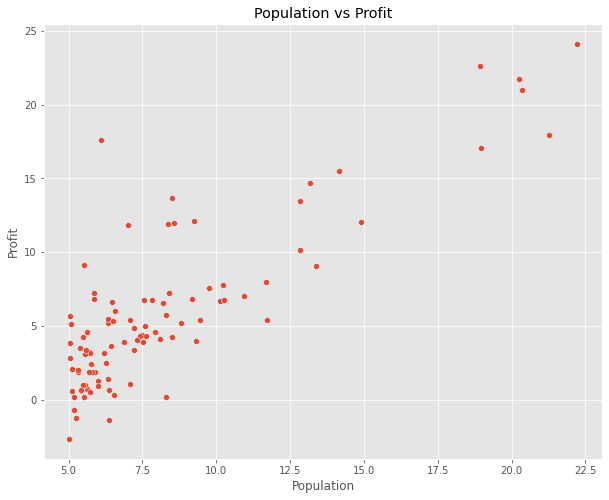

In [ ]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = df)
ax.set_title("Population vs Profit")

In [ ]:
def cost_function(x,y,theta):
  m = len(y)
  y_pred = x.dot(theta)
  error = (y_pred - y)**2
  return 1/(2*m) * np.sum(error)

In [ ]:
m = df.Population.size
x = np.append(np.ones((m,1)), df.Population.values.reshape(m,1), axis = 1)
y = df.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(x,y,theta)

32.072733877455676

In [ ]:
def gradient_descent(x,y,theta,alpha,iteration):
  m = len(y)
  costs = []
  for i in range(iteration):
    y_pred = x.dot(theta)
    error = np.dot(x.transpose(),(y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(x,y,theta))
  return theta, costs
     

In [ ]:
theta, costs = gradient_descent(x,y,theta,alpha = 0.01 ,iteration = 2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0  = np.linspace(-10,10,100)

theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros(((len(theta_0)), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t =np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(x,y,t)

<ipython-input-42-0b6d511d16ca>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


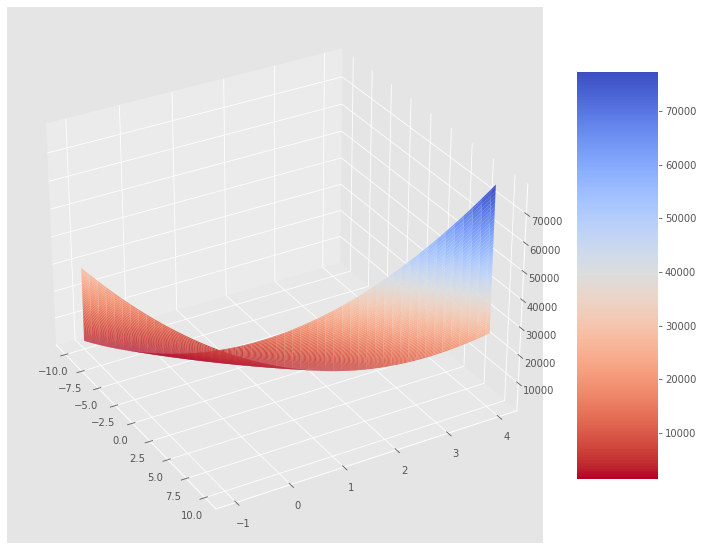

In [ ]:
fig = plt.figure(figsize = (12,15))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'coolwarm_r')
fig.colorbar(surf, shrink = 0.5, aspect  =5)

plt.xlabel("")
plt.ylabel("")
ax.set_zlabel("")

ax.view_init(30,330)

plt.show()

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

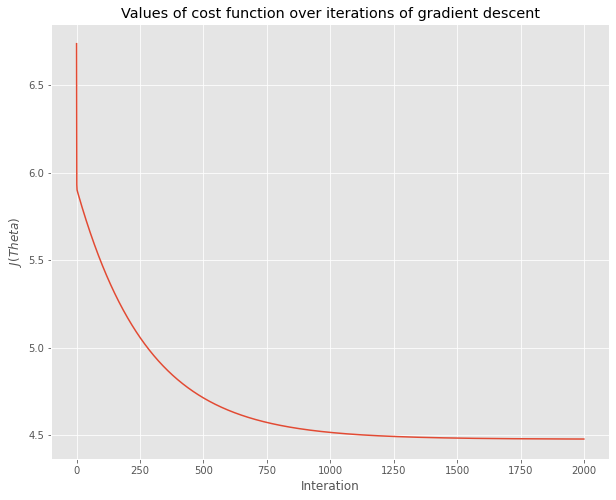

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Fit')

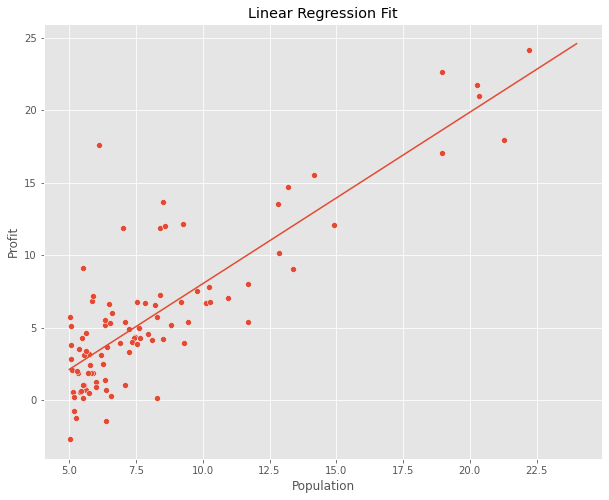

In [ ]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = df)

x_value = [x for x in range(5,25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear Regression Fit")


In [ ]:
def predict(x, theta):
   y_pred = np.dot(theta.transpose(), x)
   return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]), theta)*10000
y_pred_1

9407.825263063976

In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
y_pred_2

60242.97457763119